In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another
A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


## Creating data to view and fit

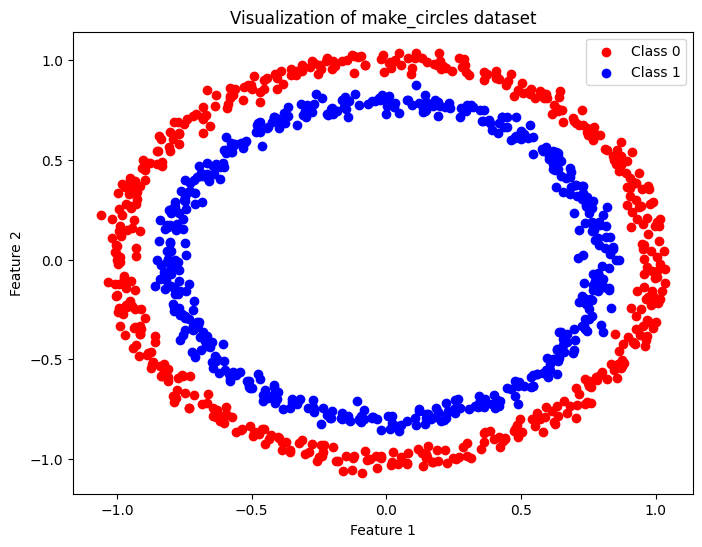

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of make_circles dataset')
plt.legend()
plt.show()

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

# Our data is a little hard to understand right now.. let's visualize it!

In [32]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


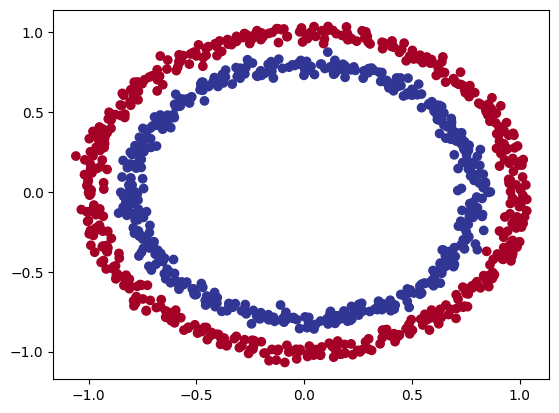

In [33]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [34]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [35]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [36]:
# Check tf version
tf.__version__

'2.12.0-rc1'

In [37]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequantial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 5.1715 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9342 - accuracy: 0.4770
Epoch 3/5
32/32 [==============================] - 0s 569us/step - loss: 1.4981 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 671us/step - loss: 0.7280 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.4940


In [38]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)

In [39]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 991us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getiing around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [41]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequantial API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [42]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization functions such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 10 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [44]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.5110


[0.6988096237182617, 0.5109999775886536]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [4]:
def plot_decision_boundary(model, X, y):
    """
    Plots the dicision boundary created by a model predicting on X.
    This function was inspired by two resources: 
    1. cs231n
    2. madewithml
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 788us/step
doing binary classification


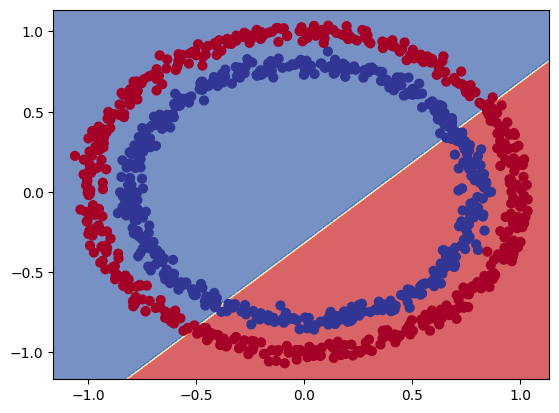

In [47]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [7]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regresion data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_train = tf.expand_dims(X_reg_train, axis=-1)

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
#             y_reg_train,
#             epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [8]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 147.7341 - mae: 147.7341
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 60.7047 - mae: 60.7047
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 56.4772 - mae: 56.4772
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 55.0900 - mae: 55.0900
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 43.2597 - mae: 43.2597
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 44.8625 - mae: 44.8625
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 42.4535 - mae: 42.4535
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.7538 - mae: 42.7538
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 42.0600 - mae: 42.0600
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.5886 - mae: 42.5886
Epoch 11/100
5/5 [==============================] - 0s 2m

2/2 [==============================] - 0s 3ms/step


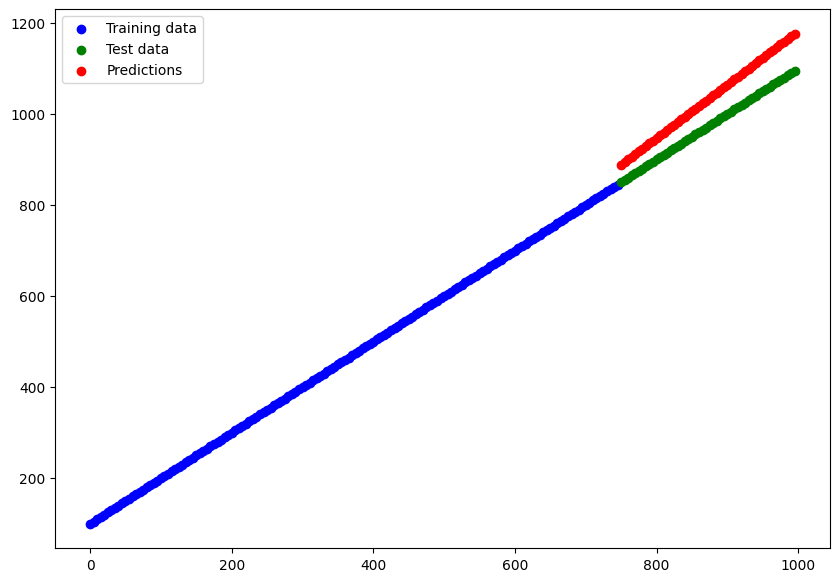

In [9]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c='r', label="Predictions")
plt.legend()

# The missing piece: Non-linearity

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3727 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3090 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 956us/step - loss: 4.2874 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 941us/step - loss: 4.2485 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 930us/step - loss: 4.2300 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 924us/step - loss: 4.1832 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1668 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1645 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1629 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1613 - accuracy: 0.4740
E

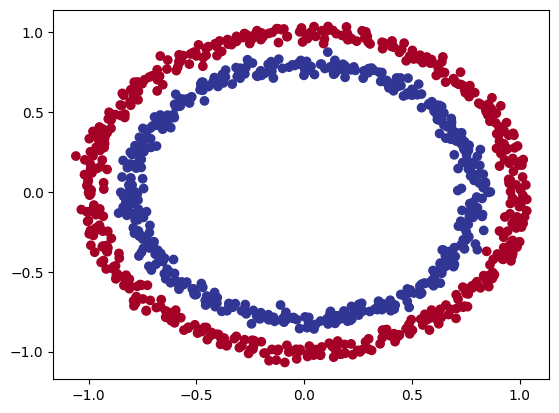

In [12]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 781us/step
doing binary classification


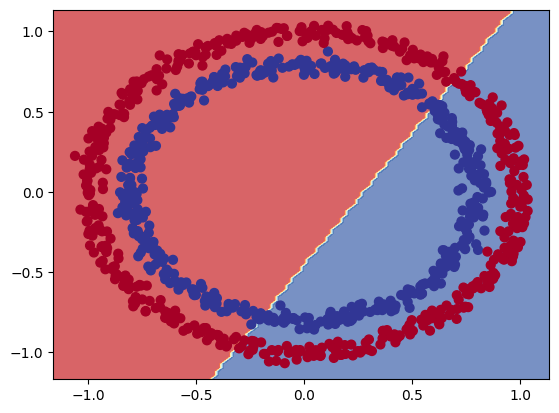

In [13]:
# Check the dicision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

## Let's try build out first neural network with a non-linear activation function

In [6]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3574 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 978us/step - loss: 4.3308 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 947us/step - loss: 4.3134 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 566us/step - loss: 4.3107 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 687us/step - loss: 4.3086 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 979us/step - loss: 4.3061 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 977us/step - loss: 4.3037 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3014 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 994us/step - loss: 4.2899 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 1000us/step - loss: 4.2745 - accuracy:

32/32 [==============================] - 0s 846us/step - loss: 3.2597 - accuracy: 0.4770
Epoch 83/100
32/32 [==============================] - 0s 881us/step - loss: 3.2432 - accuracy: 0.4760
Epoch 84/100
32/32 [==============================] - 0s 530us/step - loss: 3.2079 - accuracy: 0.4770
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1792 - accuracy: 0.4770
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1308 - accuracy: 0.4790
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1020 - accuracy: 0.4790
Epoch 88/100
32/32 [==============================] - 0s 833us/step - loss: 3.0886 - accuracy: 0.4780
Epoch 89/100
32/32 [==============================] - 0s 817us/step - loss: 3.0419 - accuracy: 0.4770
Epoch 90/100
32/32 [==============================] - 0s 512us/step - loss: 3.0101 - accuracy: 0.4780
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9925 - accuracy: 0.4810
E

313/313 [==============================] - 0s 661us/step
doing binary classification


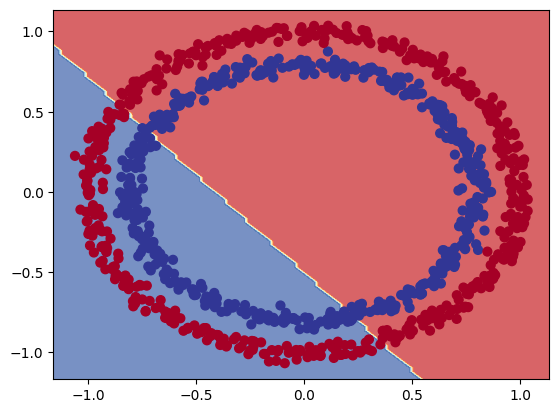

In [7]:
# Check the dicision boundary for our latest model
plot_decision_boundary(model=model_5, X=X, y=y)

In [13]:
# Time to replicate the multi-layer neural network from TensorFlow playground to code ...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/250


32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 172/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 173/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


In [12]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.3730


[0.5291059613227844, 0.37299999594688416]

313/313 [==============================] - 0s 698us/step
doing binary classification


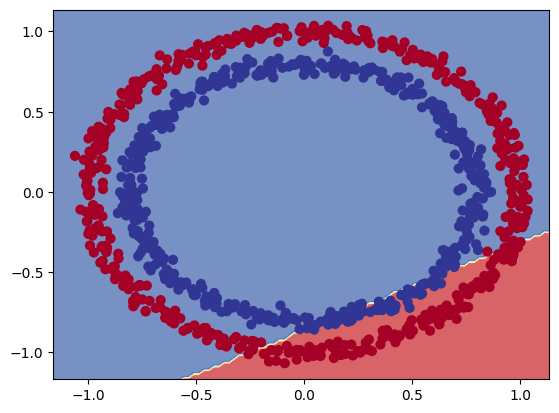

In [14]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=350)

Epoch 1/350
32/32 [==============================] - 1s 1ms/step - loss: 0.7202 - accuracy: 0.5000
Epoch 2/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7107 - accuracy: 0.4860
Epoch 3/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.4590
Epoch 4/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.4580
Epoch 5/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.4260
Epoch 6/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.4010
Epoch 7/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4260
Epoch 8/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4370
Epoch 9/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4270
Epoch 10/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4140
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.6540
Epoch 84/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.6710
Epoch 85/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6820
Epoch 86/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.6920
Epoch 87/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.6850
Epoch 88/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6830
Epoch 89/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.7010
Epoch 90/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6660
Epoch 91/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7140
Epoch 92/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7170
Epoch 93/350


32/32 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8440
Epoch 165/350
32/32 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8520
Epoch 166/350
32/32 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8480
Epoch 167/350
32/32 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8590
Epoch 168/350
32/32 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8560
Epoch 169/350
32/32 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8510
Epoch 170/350
32/32 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8590
Epoch 171/350
32/32 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8580
Epoch 172/350
32/32 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8560
Epoch 173/350
32/32 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8630
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9750
Epoch 246/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9760
Epoch 247/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9790
Epoch 248/350
32/32 [==============================] - 0s 991us/step - loss: 0.1680 - accuracy: 0.9770
Epoch 249/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.9830
Epoch 250/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1633 - accuracy: 0.9830
Epoch 251/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1619 - accuracy: 0.9810
Epoch 252/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9830
Epoch 253/350
32/32 [==============================] - 0s 976us/step - loss: 0.1583 - accuracy: 0.9850
Epoch 254/350
32/32 [==============================] - 0s 986us/step - loss: 0.1561 - accuracy: 0.983

32/32 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9860
Epoch 327/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9820
Epoch 328/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9820
Epoch 329/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9850
Epoch 330/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9840
Epoch 331/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9810
Epoch 332/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9840
Epoch 333/350
32/32 [==============================] - 0s 991us/step - loss: 0.0904 - accuracy: 0.9840
Epoch 334/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9850
Epoch 335/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9840
Ep

In [19]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9820


[0.08308777958154678, 0.9819999933242798]

313/313 [==============================] - 0s 734us/step
doing binary classification


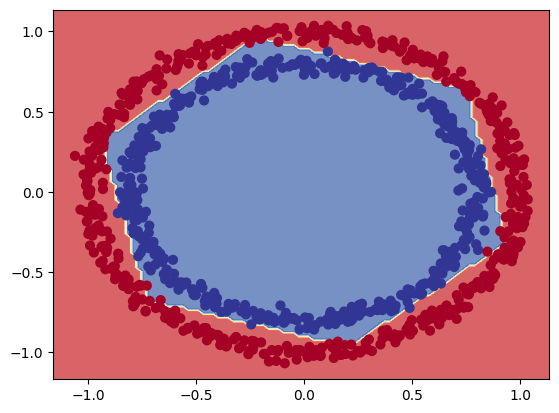

In [20]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [ ]:
# 